In [1]:
import qiskit
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi
import matplotlib.pyplot as plt
import random

In [2]:
theta_arr = []
count_1 = []
count_0 = []

for i in range(100):
    q = QuantumRegister(1)
    c = ClassicalRegister(1)
    circuit = QuantumCircuit(q,c)
    
    circuit.h(q)
    theta = random.uniform(0, pi)
#     circuit.u3(theta, -pi/2, pi/2,q)
    circuit.rz(theta, q)
    simulator = Aer.get_backend('statevector_simulator')
    job = execute(circuit, simulator)
    result = job.result()
    statevector = result.get_statevector()
    theta_arr.append(theta)
    
    
    circuit.measure(q, c)
    
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit, simulator, shots = 1024)
    result = job.result()
    counts = result.get_counts()
#     print(counts)
    
    count_1.append(counts['1']*100/1024)
    count_0.append(counts['0']*100/1024)

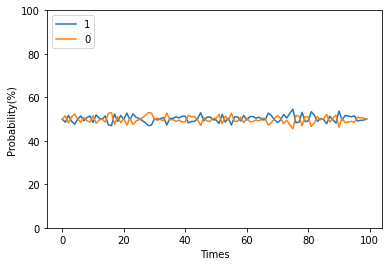

In [3]:
plt.plot(count_1, label="1")
plt.plot(count_0, label="0")

plt.ylabel('Probability(%)')
plt.xlabel('Times')
plt.ylim([0, 100])
plt.legend(loc="upper left")
plt.show()

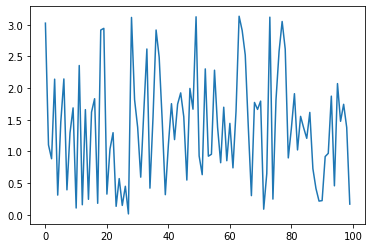

In [4]:
plt.plot(theta_arr)
plt.show()